In [2]:
import pandas as pd
df = pd.read_csv('weight_height.csv')
df.head()

,weight,height
0,45,148
1,50,153
2,53,155
3,54,159
4,56,160


In [3]:
X = df[['weight']]
Y = df[['height']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.shape

(24, 1)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

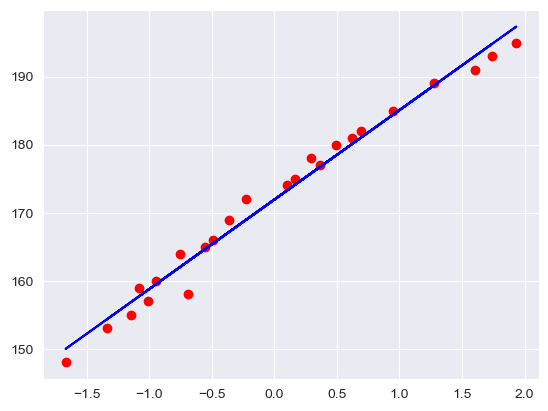

In [66]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MSE", mean_squared_error(Y_test, model.predict(X_test)))
print("R2", r2_score(Y_test, model.predict(X_test)))
print("MAE", mean_absolute_error(Y_test, model.predict(X_test)))

MSE 4.7312908563453915
R2 0.899155434678251
MAE 1.8188457631370436


In [68]:
pd_to_predict = pd.DataFrame([45, 90, 39, 100, 56], columns=['weight'])
pd_to_predict = sc.transform(pd_to_predict)
predicted = model.predict(pd_to_predict)
model.coef_


array([[13.14593193]])

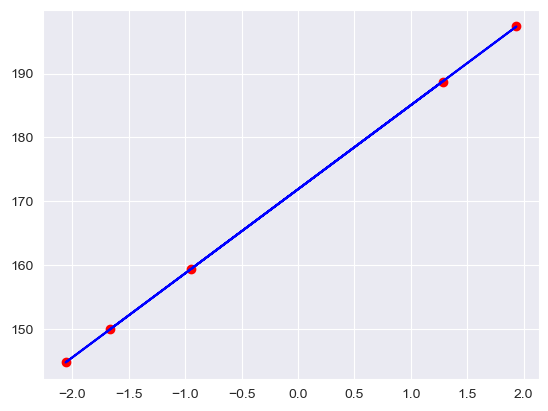

In [69]:
plt.scatter(pd_to_predict, predicted, color='red')
plt.plot(pd_to_predict, predicted, color='blue')

In [ ]:
print("MSE", mean_squared_error(pd_to_predict, predicted))
print("R2", r2_score(pd_to_predict, predicted))